In [74]:
import scanpy as sc
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [75]:
data = sc.read_h5ad('data/stereo_seq_olfactory_bulb_bin140_annotation.h5ad')

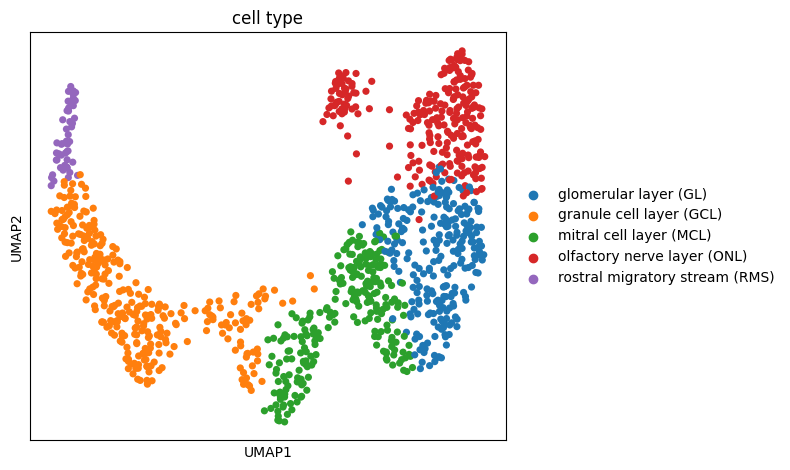

In [76]:
sc.pp.neighbors(data)
sc.pl.umap(data, color='cell type', show=False)
fig = plt.gcf()
fig.set_size_inches(8, 4.8)
plt.tight_layout()
plt.savefig(f'umap_no_emb.png')

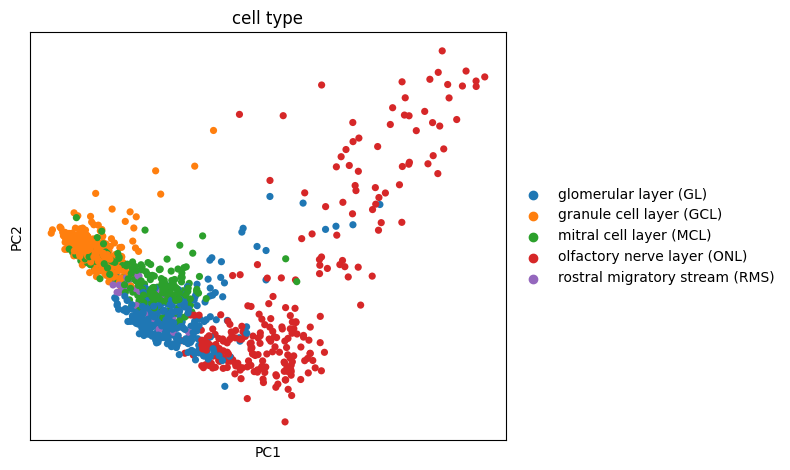

In [77]:
sc.pp.pca(data, n_comps=2)
sc.pl.pca(data, color='cell type', show=False)
fig = plt.gcf()
fig.set_size_inches(8, 4.8)
plt.tight_layout()
plt.savefig(f'pca_no_emb.png')

In [78]:
train_ind, test_ind = next(iter(StratifiedShuffleSplit(n_splits=2,train_size=0.8,random_state=1).split(data, data.obs['cell type'])))
test_data = data[test_ind]

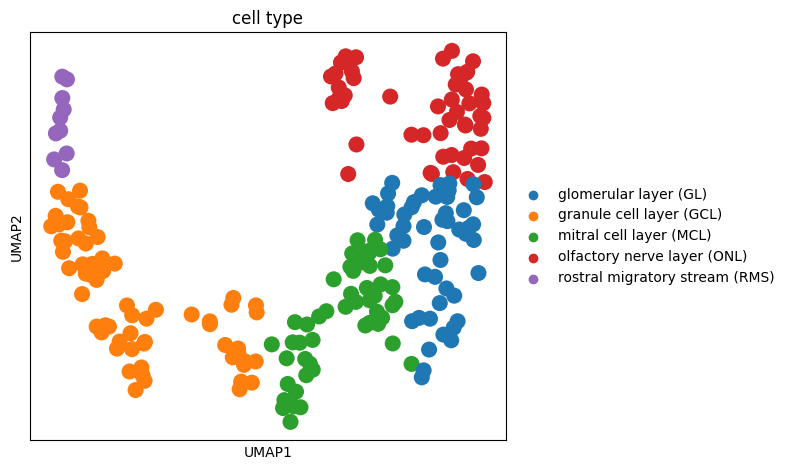

In [79]:
sc.pp.neighbors(test_data)
sc.pl.umap(test_data, color='cell type', show=False)
fig = plt.gcf()
fig.set_size_inches(8, 4.8)
plt.tight_layout()
plt.savefig(f'umap_no_emb_test.png')

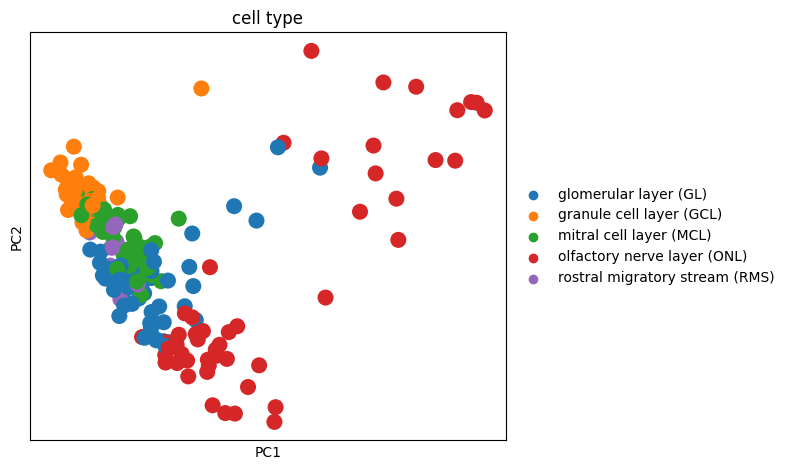

In [80]:
sc.pp.pca(test_data, n_comps=2)
sc.pl.pca(test_data, color='cell type', show=False)
fig = plt.gcf()
fig.set_size_inches(8, 4.8)
plt.tight_layout()
plt.savefig(f'pca_no_emb_test.png')

In [81]:
score = []
data_pp = MinMaxScaler(clip=True).fit(data[train_ind].X).transform(data.X)
data_2d = PCA(n_components=2,svd_solver='full').fit_transform(data_pp)
for _ in range(20):
    score.append(silhouette_score(data_2d, data.obs['cell type']))
print(np.mean(score))

0.16849262


In [82]:
score = []
data_pp = MinMaxScaler(clip=True).fit(data[train_ind].X).transform(data[test_ind].X)
data_2d = PCA(n_components=2,svd_solver='full').fit_transform(data_pp)
for _ in range(20):
    score.append(silhouette_score(data_2d, data[test_ind].obs['cell type']))
print(np.mean(score))

0.13117352
